In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Used to create training and testing data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import umap

# Mediapipe Data Solutions

In [208]:
X = np.load('../export_data/X_data.npy')
y = np.load('../export_data/y_data.npy')

Xmp_train, Xmp_test, ymp_train, ymp_test = train_test_split(X, y, test_size=4*y.shape[1], stratify=y)
X.shape

(197, 151, 258)

In [209]:
mp_full = np.array([features_2d.flatten() for features_2d in X])
Xmp_train2D = np.array([features_2d.flatten() for features_2d in Xmp_train])
Xmp_test2D = np.array([features_2d.flatten() for features_2d in Xmp_test])

## Dimension Reduction

In [210]:
pca = PCA(n_components=12, svd_solver = 'full')
pca_train = pca.fit_transform(Xmp_train2D)
pca_test = pca.fit_transform(Xmp_test2D)

# Visualizing Components

In [211]:
def visualize_labels(features, referenceLabels):
    plt.figure()
    cmap_light = ListedColormap(['#9e0142', '#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd','#5e4fa2'])
    y = referenceLabels

    colorind = np.where(y>0)[1]
    print(y.shape)
    plt.scatter(features[:, 0], features[:, 1], c = colorind, cmap = cmap_light)
    plt.xlim(features[:, 0].min() - 0.1, features[:, 0].max() + 0.1)
    plt.ylim(features[:, 1].min() - 0.1, features[:, 1].max() + 0.1)
    plt.show()
  
    t = 0

(197, 9)


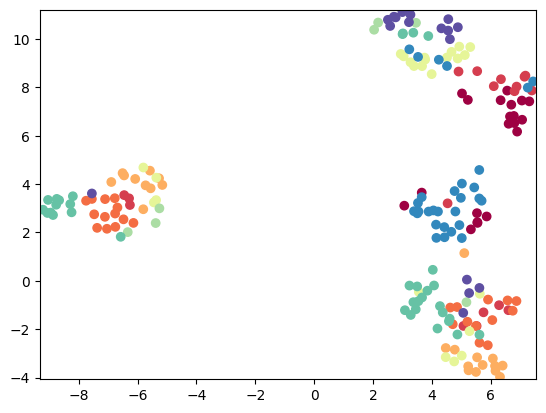

In [212]:
umap_full = umap.UMAP(n_neighbors=12, min_dist=0.5).fit_transform(mp_full)
visualize_labels(umap_full, y)

## kNN

In [214]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xmp_train2D, ymp_train)
y_pred = knn.predict(Xmp_test2D)
accuracy = accuracy_score(ymp_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6111111111111112


In [216]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(pca_train, ymp_train)
y_pred = knn.predict(pca_test)
accuracy = accuracy_score(ymp_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.05555555555555555


In [217]:
k_values = [i for i in range (1,10)]
scores = []

for k in k_values:
    knn_test = KNeighborsClassifier(n_neighbors=k)
    knn_test.fit(Xmp_train2D,ymp_train)
    score = accuracy = accuracy_score(ymp_test, knn_test.predict(Xmp_test2D))
    scores.append(np.mean(score))

scores

[0.7222222222222222,
 0.5555555555555556,
 0.6111111111111112,
 0.5555555555555556,
 0.6111111111111112,
 0.4166666666666667,
 0.4444444444444444,
 0.4166666666666667,
 0.5]

## Random Forest

In [218]:
rForest = RandomForestClassifier(n_estimators=100)
rForest.fit(Xmp_train2D, ymp_train)

RFy_pred = rForest.predict(Xmp_test2D)
print("Accuracy:", accuracy_score(ymp_test, RFy_pred))

Accuracy: 0.4166666666666667


In [228]:
rForest = RandomForestClassifier(n_estimators=5)
rForest.fit(pca_train, ymp_train)

RFy_pred = rForest.predict(pca_test)
print("Accuracy:", accuracy_score(ymp_test, RFy_pred))

Accuracy: 0.05555555555555555


# VR Solution Data

In [192]:
Xvr = np.load('../VR_exportdata/X_dataVR.npy')
yvr = np.load('../VR_exportdata/y_dataVR.npy')

Xvr_train, Xvr_test, yvr_train, yvr_test = train_test_split(Xvr, yvr, test_size=4*yvr.shape[1], stratify=yvr)

Xvr.shape

(213, 120, 144)

In [193]:
vr_full = np.array([features_2d.flatten() for features_2d in Xvr])
Xvr_train2D = np.array([features_2d.flatten() for features_2d in Xvr_train])
Xvr_test2D = np.array([features_2d.flatten() for features_2d in Xvr_test])

In [194]:
pca = PCA(n_components=15, svd_solver = 'full')
pcavr_train = pca.fit_transform(Xvr_train2D)
pcavr_test = pca.fit_transform(Xvr_test2D)

(213, 9)


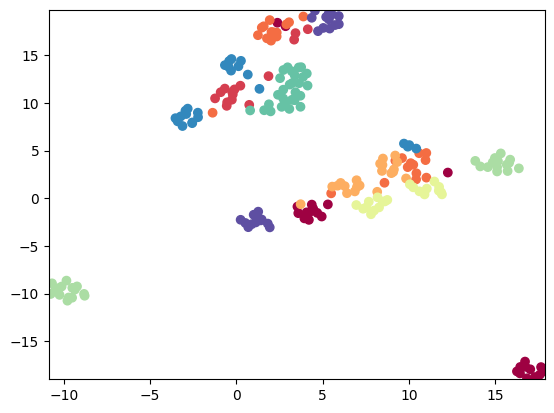

In [195]:
umapvr_full = umap.UMAP(n_neighbors=12, min_dist=1).fit_transform(vr_full)
visualize_labels(umapvr_full, yvr)

In [196]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xvr_train2D, yvr_train)
y_pred = knn.predict(Xvr_test2D)
accuracy = accuracy_score(yvr_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8888888888888888


In [197]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(pcavr_train, yvr_train)
y_pred = knn.predict(pcavr_test)
accuracy = accuracy_score(yvr_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3888888888888889


In [198]:
k_values = [i for i in range (1,10)]
scores = []

for k in k_values:
    knn_test = KNeighborsClassifier(n_neighbors=k)
    knn_test.fit(Xvr_train2D,yvr_train)
    score = accuracy = accuracy_score(yvr_test, knn_test.predict(Xvr_test2D))
    scores.append(np.mean(score))

scores

[0.9166666666666666,
 0.8611111111111112,
 0.8888888888888888,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778]

In [207]:
rForest = RandomForestClassifier(n_estimators=100)
rForest.fit(Xvr_train2D, yvr_train)

RFy_pred = rForest.predict(Xvr_test2D)
print("Accuracy:", accuracy_score(yvr_test, RFy_pred))

Accuracy: 0.9166666666666666


In [231]:
rForest = RandomForestClassifier(n_estimators=5)
rForest.fit(pcavr_train, yvr_train)

RFy_pred = rForest.predict(pcavr_test)
print("Accuracy:", accuracy_score(yvr_test, RFy_pred))

Accuracy: 0.16666666666666666
